# Machine Learning Challenge - team_pizza_n_bratwurst

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing, decomposition, linear_model
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import evaluation

## Parsing the Dataset

In [2]:
header = pd.read_csv('Datasets/header.txt', delimiter=",", header=None)
X_train = pd.read_csv('Datasets/train_data.csv', delimiter=",", header=None)
X_train.columns = list(header.values)
X_test = pd.read_csv('Datasets/test_data.csv', delimiter=",", header=None)
X_test.columns = list(header.values)
y_train = pd.read_csv('Datasets/train_labels.csv', delimiter=",", header=None)
y_train_row = np.ravel(y_train)
y_label_names = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']

### Size of datasets

In [3]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4363, 264)
Shape of y_train:  (4363, 1)
Shape of X_test:  (6544, 264)


### Content of X_train

In [4]:
X_train.head()

,MFCC_Mean_Band_1,MFCC_Mean_Band_2,MFCC_Mean_Band_3,MFCC_Mean_Band_4,MFCC_Mean_Band_5,MFCC_Mean_Band_6,MFCC_Mean_Band_7,MFCC_Mean_Band_8,MFCC_Mean_Band_9,MFCC_Mean_Band_10,...,Rhythm_Max_Band_15,Rhythm_Max_Band_16,Rhythm_Max_Band_17,Rhythm_Max_Band_18,Rhythm_Max_Band_19,Rhythm_Max_Band_20,Rhythm_Max_Band_21,Rhythm_Max_Band_22,Rhythm_Max_Band_23,Rhythm_Max_Band_24
0,37.387,-17.283,49.64000,11.4170,1.8942,-2.0002,1.3012,1.1586,-6.5276,-1.9027,...,7.5717,6.8944,5.7944,3.1028,2.8110,2.7815,1.7431,1.7055,1.0378,0.049366
1,49.426,43.378,8.73340,-5.5765,-2.6802,-27.7490,27.8580,2.5126,14.5890,7.5450,...,9.9208,10.3140,11.0900,10.1500,7.1359,5.9452,4.4554,3.9025,1.4580,0.001066
2,42.075,-84.998,0.86254,7.6005,-1.6374,6.8026,-1.5204,-6.8992,1.2729,-6.5295,...,9.3463,10.3520,7.1945,6.3734,4.5575,3.8467,3.9124,3.5032,1.2211,0.001066
3,52.261,45.071,22.93400,-2.1134,-26.8250,-23.0880,-3.2843,-3.4469,-4.1212,2.8183,...,13.8150,11.5750,13.5710,10.1950,8.5917,7.1245,5.8149,5.1486,2.0151,0.001066
4,44.731,67.540,33.55800,-1.9516,-14.6890,-22.2170,-9.0476,1.0945,16.1200,4.6033,...,8.9629,10.8800,10.1680,7.7896,7.9014,4.6252,3.2544,2.1685,1.0518,0.001066


### Amount of missing values

In [5]:
print("Amount of missing values in X_train: ", sum(pd.isnull(X_train).sum()))
print("Amount of missing values in X_test: ", sum(pd.isnull(X_test).sum()))

Amount of missing values in X_train:  0
Amount of missing values in X_test:  0


### Summary of each features

In [6]:
X_train.describe()

,MFCC_Mean_Band_1,MFCC_Mean_Band_2,MFCC_Mean_Band_3,MFCC_Mean_Band_4,MFCC_Mean_Band_5,MFCC_Mean_Band_6,MFCC_Mean_Band_7,MFCC_Mean_Band_8,MFCC_Mean_Band_9,MFCC_Mean_Band_10,...,Rhythm_Max_Band_15,Rhythm_Max_Band_16,Rhythm_Max_Band_17,Rhythm_Max_Band_18,Rhythm_Max_Band_19,Rhythm_Max_Band_20,Rhythm_Max_Band_21,Rhythm_Max_Band_22,Rhythm_Max_Band_23,Rhythm_Max_Band_24
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,...,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000
mean,44.061232,3.403105,4.435200,1.302779,-5.930146,-10.254129,-1.237425,-2.546184,3.769297,1.744708,...,10.873155,11.070106,10.356626,8.901890,6.750214,5.566880,4.522454,3.647420,1.779626,0.127980
std,5.623130,49.095594,34.225263,15.924631,22.144000,12.222974,13.962585,8.037242,9.955007,6.640795,...,3.990877,4.114535,3.976631,3.359308,2.532830,2.227236,1.914263,1.653805,0.944251,0.254935
min,17.026000,-334.950000,-171.400000,-89.266000,-111.360000,-72.304000,-68.498000,-58.349000,-68.361000,-31.270000,...,0.045971,0.079733,0.031322,0.010467,0.001066,0.001066,0.001066,0.001066,0.001066,0.001066
25%,40.756500,-22.828000,-15.133000,-8.000850,-19.883500,-19.033500,-9.836150,-7.102450,-2.017150,-2.663700,...,8.032000,8.277700,7.627550,6.618000,5.046600,4.061450,3.245950,2.498600,1.165800,0.001066
50%,44.742000,9.044300,7.597600,-0.725070,-5.618800,-11.443000,-1.390900,-2.380500,3.929100,1.673600,...,10.830000,10.923000,10.290000,8.863700,6.688900,5.556800,4.423400,3.535400,1.644600,0.001066
75%,48.307500,35.714000,26.429500,8.729200,7.987050,-2.915450,6.970800,2.087400,9.741250,5.950950,...,13.608000,13.854500,13.012500,11.131500,8.373550,6.961050,5.693750,4.665950,2.267850,0.005380
max,55.706000,183.370000,197.150000,107.240000,161.900000,55.764000,138.400000,37.512000,56.069000,38.294000,...,26.280000,26.637000,31.465000,22.770000,18.363000,16.768000,13.589000,11.939000,8.631500,1.389200


### Correlation Matrix - Highly correlated features!

We can see from the plot that some features are highly correlated, especially the rhythm ones

In [7]:
cm = X_train.corr()

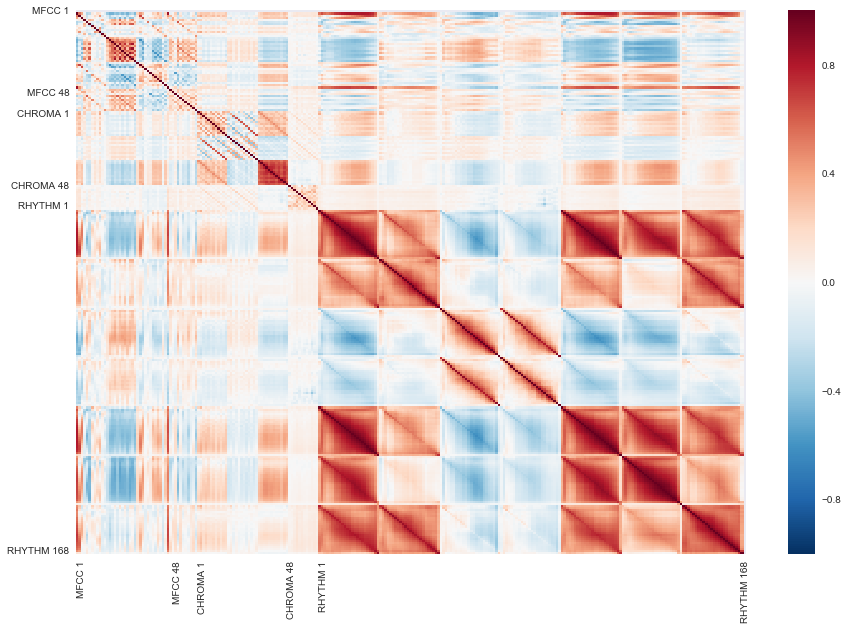

In [8]:
# plot the heatmap
plt.figure(figsize=(15, 10))
labels=["MFCC 1", "MFCC 48", "CHROMA 1", "CHROMA 48", "RHYTHM 1", "RHYTHM 168" ]
sns.heatmap(cm, xticklabels=labels, yticklabels=labels)
major_ticks = [2,40,50,85,98,265]                                             
plt.xticks(major_ticks)                                                       
plt.yticks([2,170,180,215,225,265] )
plt.show()

### Histogram of labels - Unbalanced data set!

Absolut amount of each genre in X_train:  [2178, 618, 326, 253, 214, 260, 141, 195, 92, 86]


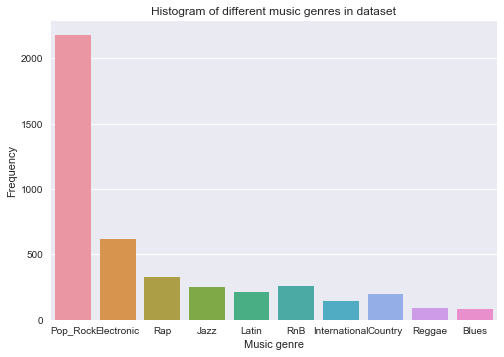

In [9]:
genre, count = np.unique(y_train, return_counts=True)
dict_label_count = dict(zip(genre, count))
print("Absolut amount of each genre in X_train: ", list(dict_label_count.values()))

sns.set(color_codes=True)

fig = plt.subplots()
ax = plt.subplot(111)
sns.barplot(y_label_names,list(dict_label_count.values()), ax=ax)
ax.set_title("Histogram of different music genres in dataset")
ax.set_xlabel("Music genre")
ax.set_ylabel("Frequency")

plt.show()

## Models

The first method that we try is a simple Logistic Regression.  
Considering the fact we have an high number of features we try to perform a PCA (Principal Component Analysis). 

We use a StratifiedKFold Cross Validation using the ``GridSearchCV`` function in order to tune the hyperparameters for our model, that are the number of principal components chosen and the C coefficient for the logistic regression

### LogRegression with PCA

In [10]:
### Preprocessing ###
X_train_normalized = preprocessing.scale(X_train)

### Defining Pipeline###
model_logistic = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial')
pca = decomposition.PCA()

pipe = Pipeline(steps=[('pca', pca), ('logistic', model_logistic)])

n_components = [10, 50, 100]
Cs = np.logspace(-5, 1, 15)

# Execution of Cross validation
scoring = 'accuracy'
# scoring = 'neg_log_loss'
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs),
                         scoring=scoring,
                         cv=3)

estimator.fit(X_train_normalized, y_train_row)

print("The best CV score is: {0}".format(estimator.best_score_))


The best CV score is: 0.6506990602796241


#### Best number of components

Precision: 0.45621257523169756


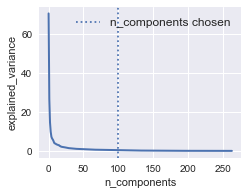

In [11]:
clf = estimator.best_estimator_
prediction = clf.predict(X_train_normalized)
precision = evaluation.precision(prediction, y_train_row)
print("Precision: {0}".format(precision))

### Plot the best number of components ###
pca.fit(X_train_normalized)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance')
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

#### Error by genre

Correct predictions per genre:  [1972  418  243  144   53  110   14   61   44    9]
Wrong predictions per genre:  [206 200  83 109 161 150 127 134  48  77]


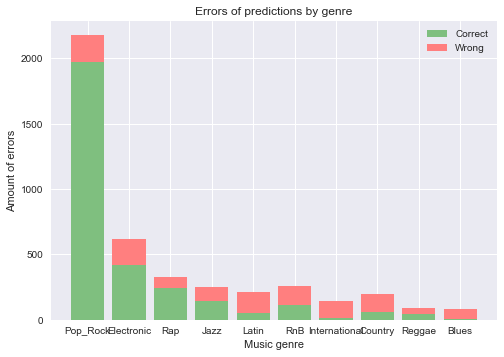

In [12]:
evaluation.visualize_errors_by_genre(y_train_row, prediction, y_label_names)

#### Confusion Matrix

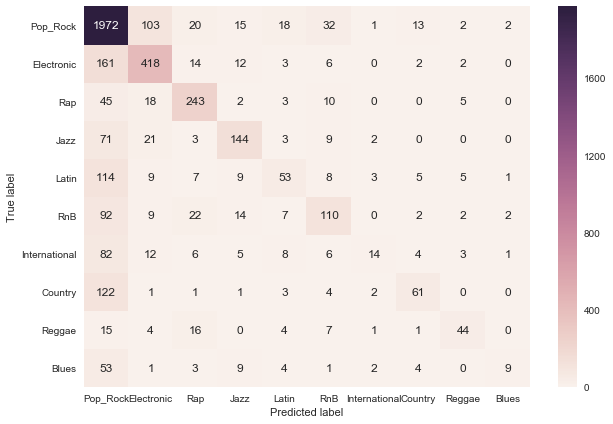

In [13]:
evaluation.confusion_matrix(y_train_row, prediction, y_label_names)

We can notice that considering the fact that the dataset is strongly unbalanced using accuracy as a metric we get a classifier that is strongly biased towards the majority class, that is Pop_Rock

### SVC with PCA

Here we try a similar approach, but this time we a Support Vector Classifier using the rbf kernel.

In [14]:
## Defining pipeline with PCA and SVC rbf hyperparameter tuning

svm = SVC(kernel="rbf")
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('svc', svm)])
n_components = [20, 60, 80]
C_range = np.logspace(2, 6, 5)
X_train = preprocessing.scale(X_train)
gamma_range = np.logspace(-9, -1, 5)
svc_pipe = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              svc__C=C_range,
                              svc__gamma=gamma_range),
                         n_jobs=-1)
svc_pipe.fit(X_train, y_train_row)
print("The best CV score is: {0}".format(svc_pipe.best_score_))

The best CV score is: 0.6449690579876232


Precision: 0.4003343467555796


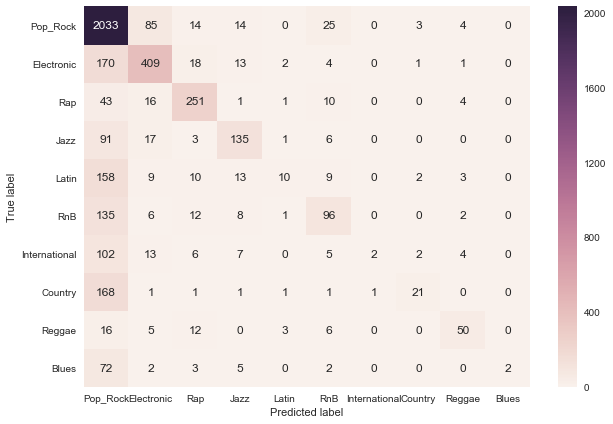

In [15]:
clf = svc_pipe.best_estimator_
prediction = clf.predict(X_train)
precision = evaluation.precision(prediction, y_train_row)
print("Precision: {0}".format(precision))
evaluation.confusion_matrix(y_train_row, prediction, y_label_names)

We can see that the situation didn't change that much

### LogRegression with RFE

Here we try a different method for Feature Selection that is Feature ranking with recursive feature elimination (RFE). 

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

In [16]:
log = linear_model.LogisticRegressionCV(multi_class='multinomial', class_weight=None, cv=3)
rfecv = RFECV(estimator=log, step=5, cv=2,
              scoring='accuracy',
              n_jobs=-1)
rfecv.fit(X_train, y_train_row)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 84


### Number of selected features

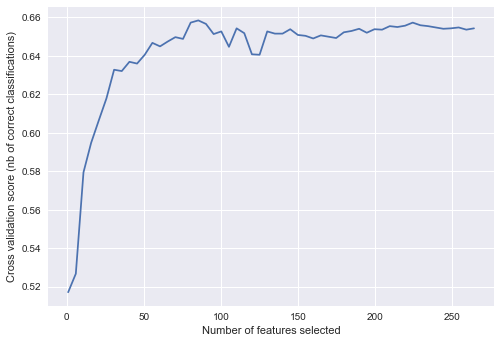

In [17]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
n_features = np.linspace(1,264, len(rfecv.grid_scores_))
plt.plot(n_features, rfecv.grid_scores_)
plt.show()

In [18]:
X_transf = rfecv.transform(X_train)
log_reg = linear_model.LogisticRegressionCV(multi_class='multinomial',cv=3)
log_reg.fit(X_transf, y_train_row)

prediction = log_reg.predict(X_transf)
accuracy = log_reg.score(X_transf, y_train_row)
print("Accuracy: {0}". format(accuracy))
precision = evaluation.precision(prediction, y_train_row)
print("Precision: {0}". format(precision))

Accuracy: 0.7084574833829933
Precision: 0.47036621390686745


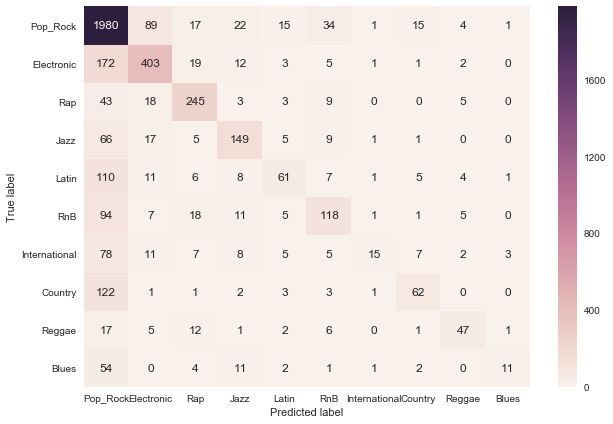

In [19]:
evaluation.confusion_matrix(y_train_row, prediction, y_label_names)

The situation is very similar again. We got a slightly better accuracy but the average precision is very low.
Accuracy is not the best metric to evaluate the model in this case.

## Dealing with unbalanced data

### Undersampling

Random undersampling is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes

In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_sample(X_train, y_train_row)

log_reg = linear_model.LogisticRegressionCV(multi_class='multinomial', cv=3)
log_reg.fit(X_resampled, y_resampled)

pred_und = log_reg.predict(X_train)
accuracy = log_reg.score(X_train, y_train_row)
print("Accuracy: {0}". format(accuracy))
precision = evaluation.precision(pred_und, y_train_row)
print("Precision: {0}". format(precision))

Accuracy: 0.5076782030712812
Precision: 0.5312292522183475


Correct predictions per genre:  [1030  332  231  159   76  113   40  120   65   49]
Wrong predictions per genre:  [1148  286   95   94  138  147  101   75   27   37]


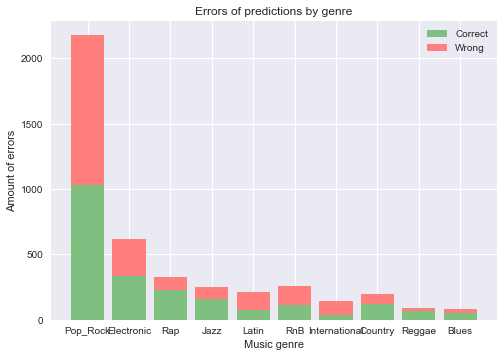

In [21]:
evaluation.visualize_errors_by_genre(y_train_row, pred_und, y_label_names)

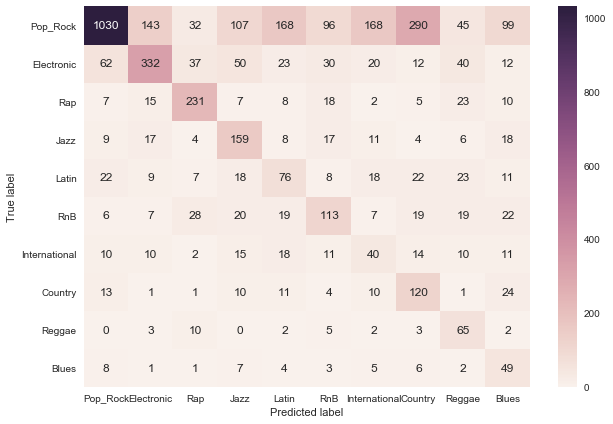

In [22]:
evaluation.confusion_matrix(y_train_row, pred_und, y_label_names)

We can see that in this case the precision for each class is clearly better, at the cost of a much worse general accuracy.

## Further developments

The idea now is to explore different other ways to deal with an unbalanced dataset and feature selection.

Another idea is to use a semi-supervised approach in order to make use of the additional unlabeled data to better capture the shape of the underlying data distribution and generalize better to new samples.
